# Aula 32 - Deep Learning

<center>
<img src="./images/deep-learning.png" alt="drawing" width="500px"></center>

# Pré-aula

Perceptron: The Artificial Neuron (An Essential Upgrade To The McCulloch-Pitts Neuron)
https://towardsdatascience.com/perceptron-the-artificial-neuron-4d8c70d5cc8d

What the Hell is Perceptron?
https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53

Towards Ethical Machine Learning
https://towardsdatascience.com/towards-ethical-machine-learning-302e580f5815

# Expectativas

<center>
<img src="./images/expectations.jpg" alt="drawing" width="700px"></center>

**Instrutora:** Patrícia Pampanelli (@patriciapampanelli no Slack)

**Experiência:**
- Cientista da Computação (UFJF)
- Mestre em Modelagem Computacional (UFJF)
- Doutora em Processamento de Imagens e Visão Computacional (PUC-Rio)
- Sênior Data Scientist - Grupo ZAP


**Interesses:**
- Carros Autônomos <img src="./images/car.png" alt="drawing" width="80px">
- Visão Computacional <img src="./images/eye.png" alt="drawing" width="80px">
- Processamento de Linguagem Natural <img src="./images/text.png" alt="drawing" width="80px">
- Intelligent Video Analytics <img src="./images/camera.jpg" alt="drawing" width="80px">

# Recordando...

<center>
<img src="./images/recapitulando.png" alt="drawing" width="450px"></center>

# Recordando...

<center>
<img src="./images/recap.png" alt="drawing" width="650px"></center>

# Recordando...

<center>
<img src="./images/unsupervised.png" alt="drawing" width="700px"></center>

# Recordando...

<center>
<img src="./images/supervised.png" alt="drawing" width="700px"></center>

# AI mudando nossas vidas...

<center>
<img src="./images/iamai.jpg" alt="drawing" width="700px"></center>
https://www.youtube.com/watch?v=GiZ7kyrwZGQ

<center>
<img src="./images/machine-deep.png" alt="drawing" width="700px"></center>

# Processo de admissão de uma pós-graduação

<center>
<img src="./images/grad.png" alt="drawing" width="400px"></center>

<center>
<img src="./images/grad_1.png" alt="drawing" width="600px"></center>

<center>
<img src="./images/grad_2.png" alt="drawing" width="600px"></center>

<center>
<img src="./images/grad_3.png" alt="drawing" width="600px"></center>

<center>
<img src="./images/grad_4.png" alt="drawing" width="600px"></center>

<center>
<img src="./images/grad_5.png" alt="drawing" width="600px"></center>

<center>
<img src="./images/grad_6.png" alt="drawing" width="600px"></center>

<center>
<img src="./images/grad_7.png" alt="drawing" width="600px"></center>

<center>
<img src="./images/grad_8.png" alt="drawing" width="600px"></center>

# Perceptron

<center>
<img src="./images/perceptron.png" alt="drawing" width="700px"></center>

# Funções de ativação

<center>
<img src="./images/activation_functions.png" alt="drawing" width="800px"></center>

# Keras e Tensorflow

<center>
<img src="./images/keras-tensorflow.jpg" alt="drawing" width="800px"></center>

Ref: https://keras.io/ / https://www.tensorflow.org/

# Minha primeira rede neural em Keras...

<center>
<img src="./images/first_neural.jpg" alt="drawing" width="400px"></center>

In [7]:
# Pacotes necessários para a construção da rede neural
#!pip3 install keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
print(keras.__version__)

import matplotlib.pyplot as plt
import pandas as pd

2.2.4


In [2]:
#Dados de treinamento
import numpy as np

# https://www.kaggle.com/mohansacharya/graduate-admissions
# Histórico / Prova
df = pd.read_csv("./admission_dataset.csv")
df = df.rename(index=str, columns={"GRE Score": "GRE", 
                                   "TOEFL Score": "TOEFL", 
                                   "Chance of Admit ": "Admission_Chance"})
df = df.drop("Serial No.", axis=1)
df.head(10)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
# Criando o modelo
def baseline_model():
    
    model = Sequential()    
    model.add(Dense(4, input_dim=7, activation='relu'))
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# https://keras.io/models/about-keras-models/
print(baseline_model().summary())

from keras.utils.vis_utils import plot_model
plot_model(baseline_model(), show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
None


# Exercício 1 - Explorando os dados e Alterando a arquitetura da rede

Nosso objetivo com este exercício é construir uma nova rede com a seguinte arquitetura:

<center>
<img src="./images/model.png" alt="drawing" width="300px"></center>

Além disso, espera-se que vocês explorem os dados para conhecer um pouco mais sobre o dataset:
- Qual o tipo de dados?
- Qual a distribuição destes dados?
- O que podemos faslar sobre as features?

_Tempo: 10 minutos_

In [5]:
# Criando o modelo
def baseline_model():
    
    model = Sequential()    
    # TODO: Inserir as camadas de acordo com a arquitetura acima
    
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

print(baseline_model().summary())

In [12]:
df.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0.5, 1.0, 'GRE')

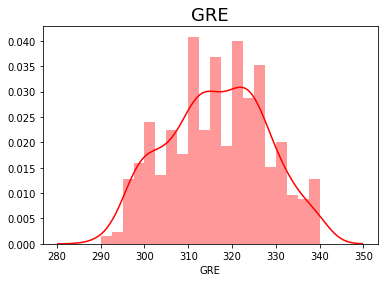

In [25]:
import seaborn as sns

sns.distplot(df['GRE'], color='red', bins=20)
plt.title('GRE', fontsize=18)

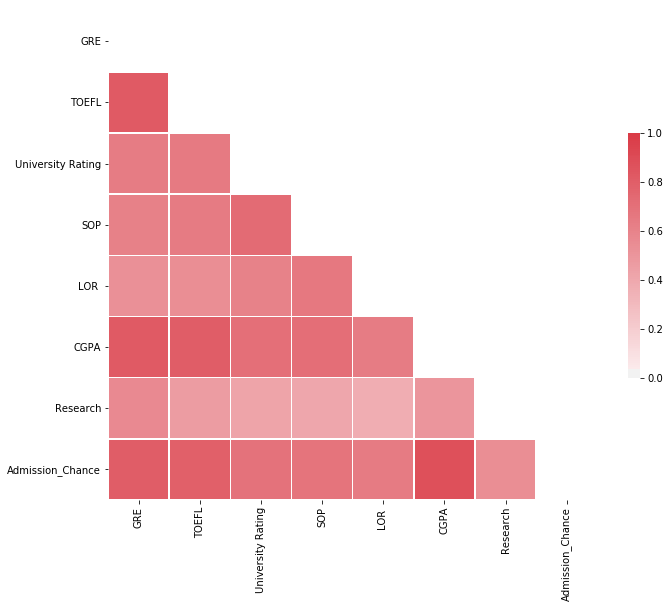

In [36]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Criando o modelo
def baseline_model():
    
    model = Sequential()    
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(8, input_dim=7, activation='relu'))
    model.add(Dense(4, input_dim=7, activation='relu'))
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

print(baseline_model().summary())

<center>
<img src="./images/coffee.png" alt="drawing" width="300px"></center>

# Como uma rede neural aprende?

<center>
<img src="./images/math.gif" alt="drawing" width="700px"></center>

# Gradiente descendente!!

<center>
<img src="./images/gradient.png" alt="drawing" width="700px"></center>

# Como atualizamos os pesos da rede?

## Backpropagation!

<center>
<img src="./images/backpropagation.png" alt="drawing" width="700px"></center>

In [ ]:
# Pré processamento
X = np.asarray(df.drop("Admission_Chance", axis=1))
Y = np.asarray(df["Admission_Chance"])

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# https://keras.io/scikit-learn-api/
estimator = KerasRegressor(build_fn = baseline_model, epochs=100, batch_size=3)

history = estimator.fit(X_train,y_train)

In [ ]:
# Avaliando o modelo
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score

train_prediction = estimator.predict(X_train)
print("Train: r_square score: ", r2_score(y_train,train_prediction))

prediction = estimator.predict(X_test)
print("\nTest: r_square score: ", r2_score(y_test, prediction))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(estimator.predict(X_test[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(estimator.predict(X_test[[2],:])))

# Exercício2: Minha _segunda_ rede neural!!!

<center>
<img src="./images/genie.gif" alt="drawing" width="500px"></center>

In [ ]:
from keras.datasets import boston_housing

# https://keras.io/datasets/
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
# Pré processamento
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    # TODO: Construa o seu modelo
    
    model.add(layers.Dense(1))

    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])
    return model

In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(8, input_dim=7, activation='relu'))
    model.add(Dense(4, input_dim=7, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])
    return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

# Pós aula

<center>
<img src="./images/typing.gif" alt="drawing" width="300px"></center>

## Backpropagation

https://medium.com/@nathaliejeans7/the-backpropagation-algorithm-demystified-41b705229727

## Estudo interessante: Minha primeira rede neural.ipynb

## Presenting Code Using Jupyter Notebook Slides
https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67